<a href="https://colab.research.google.com/github/farhanwew/Digital-Image-processing/blob/main/Region_Growing_Segmentation_Based_on_Similarity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Segmentasi Citra Berbasis Similaritas: Region Growing**

---

### 1. Konsep Region Growing

Region Growing adalah metode segmentasi berbasis similaritas di mana piksel-piksel yang memiliki karakteristik serupa (biasanya intensitas) dikumpulkan menjadi satu wilayah (region) yang besar. Proses ini dimulai dari satu atau lebih titik awal (seed points), lalu region diperluas dengan menambahkan piksel-piksel tetangga yang memenuhi kriteria kesamaan tertentu.

---

### 2. Langkah-Langkah Algoritma Region Growing

1. Pilih satu atau lebih titik awal (seed).
2. Bandingkan piksel tetangga dari region dengan ambang batas kesamaan.
3. Tambahkan piksel yang mirip ke dalam region.
4. Ulangi proses untuk piksel baru dalam region sampai tidak ada lagi yang bisa ditambahkan.

---

### 3. Contoh Implementasi Python

```python
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Fungsi region growing
def region_growing(img, seed, threshold):
    rows, cols = img.shape
    segmented = np.zeros_like(img, dtype=np.uint8)
    segmented[seed] = 255

    region_mean = float(img[seed])
    queue = [seed]

    while queue:
        x, y = queue.pop(0)
        for dx in [-1, 0, 1]:
            for dy in [-1, 0, 1]:
                nx, ny = x + dx, y + dy
                if (0 <= nx < rows and 0 <= ny < cols and segmented[nx, ny] == 0):
                    diff = abs(int(img[nx, ny]) - region_mean)
                    if diff < threshold:
                        segmented[nx, ny] = 255
                        queue.append((nx, ny))
                        region_mean = (region_mean + int(img[nx, ny])) / 2
    return segmented

# Baca citra grayscale
img = cv2.imread('image.jpg', 0)

# Tentukan seed point dan threshold
seed_point = (100, 150)
threshold = 10

# Proses segmentasi
result = region_growing(img, seed_point, threshold)

# Visualisasi
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Citra Asli')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(result, cmap='gray')
plt.title('Hasil Region Growing')
plt.axis('off')
plt.show()
```

---

### 4. Eksperimen Visual dan Parameter

```python
for t in [5, 10, 20]:
    segmented = region_growing(img, seed_point, threshold=t)
    plt.figure()
    plt.imshow(segmented, cmap='gray')
    plt.title(f'Threshold = {t}')
    plt.axis('off')
    plt.show()
```

Eksperimen ini menunjukkan bagaimana sensitivitas threshold mempengaruhi luas dan detail dari hasil segmentasi. Semakin besar threshold, semakin banyak piksel yang dimasukkan ke dalam region.

---

### 5. Integrasi dengan Thresholding dan Deteksi Tepi

Region Growing dapat digunakan bersama metode lain untuk memperbaiki akurasi segmentasi.

#### Region Growing + Thresholding :
```python
_, binary_mask = cv2.threshold(img, 120, 255, cv2.THRESH_BINARY)
pre_masked = cv2.bitwise_and(img, img, mask=binary_mask)
region = region_growing(pre_masked, (100, 150), 10)

plt.imshow(region, cmap='gray')
plt.title('Region Growing + Thresholding')
plt.axis('off')
plt.show()
```

#### Region Growing + Deteksi Tepi :
```python
edges = cv2.Canny(img, 50, 150)
region = region_growing(img, (100, 150), 10)
combined = cv2.bitwise_and(region, edges)

plt.imshow(combined, cmap='gray')
plt.title('Region Growing + Canny Edge')
plt.axis('off')
plt.show()
```

---

### 5. Kesimpulan

* Region Growing adalah metode segmentasi intuitif dan sederhana yang cocok digunakan untuk citra dengan kontras intensitas yang cukup jelas antara objek dan latar belakang.
* Kualitas segmentasi sangat sensitif atau dipengaruhi oleh pemilihan seed dan ambang batas (threshold).
* Metode ini dapat digunakan sebagai bagian dari sistem segmentasi hibrida bersama dengan thresholding atau deteksi tepi.
* Pada domain medis, segmentasi ini dapat diterapkan pada citra MRI, CT, atau retina dengan preprocessing yang sesuai.

# Load data

In [6]:
import cv2
import matplotlib.pyplot as plt

In [3]:
! unzip /content/Image.zip

Archive:  /content/Image.zip
   creating: Image/
 extracting: Image/finger.jpg        
 extracting: Image/Head.png          
 extracting: Image/paper.png         
 extracting: Image/ReadME.md         
 extracting: Image/maple.jpg         
 extracting: Image/coin.png          
 extracting: Image/maple2.jpg        
 extracting: Image/cell.jpg          
 extracting: Image/canada.jpg        
 extracting: Image/writing.png       
 extracting: Image/mountain.jpg      
 extracting: Image/fingerprint.png   


In [7]:
finger = cv2.imread('Image/finger.jpg', 0)
head = cv2.imread('Image/Head.png', 0)
paper = cv2.imread('Image/paper.png', 0)
maple = cv2.imread('Image/maple.jpg', 0)
coin = cv2.imread('Image/coin.png', 0)
maple2 = cv2.imread('Image/maple2.jpg', 0)
cell = cv2.imread('Image/cell.jpg', 0)
canada = cv2.imread('Image/canada.jpg', 0)
writing = cv2.imread('Image/writing.png', 0)
mountain = cv2.imread('Image/mountain.jpg', 0)
fingerprint = cv2.imread('Image/fingerprint.png', 0)

# Code implementation

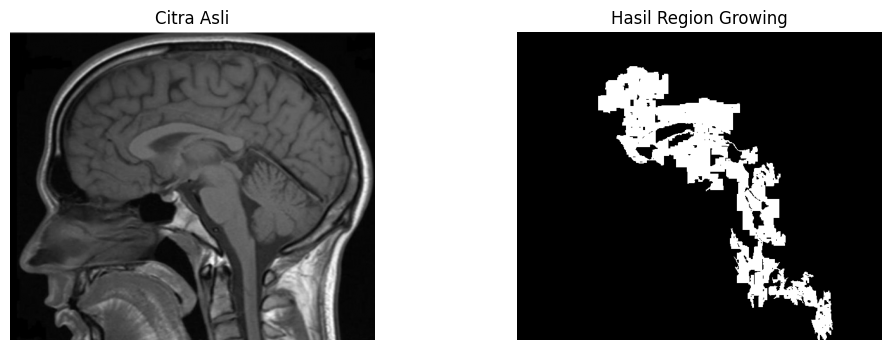

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Fungsi region growing
def region_growing(img, seed, threshold):
    rows, cols = img.shape
    segmented = np.zeros_like(img, dtype=np.uint8)
    segmented[seed] = 255

    region_mean = float(img[seed])
    queue = [seed]

    while queue:
        x, y = queue.pop(0)
        for dx in [-1, 0, 1]:
            for dy in [-1, 0, 1]:
                nx, ny = x + dx, y + dy
                if (0 <= nx < rows and 0 <= ny < cols and segmented[nx, ny] == 0):
                    diff = abs(int(img[nx, ny]) - region_mean)
                    if diff < threshold:
                        segmented[nx, ny] = 255
                        queue.append((nx, ny))
                        region_mean = (region_mean + int(img[nx, ny])) / 2
    return segmented


# Tentukan seed point dan threshold
seed_point = (100, 150)
threshold = 10

# Proses segmentasi
result = region_growing(head, seed_point, threshold)

# Visualisasi
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.imshow(head, cmap='gray')
plt.title('Citra Asli')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(result, cmap='gray')
plt.title('Hasil Region Growing')
plt.axis('off')
plt.show()

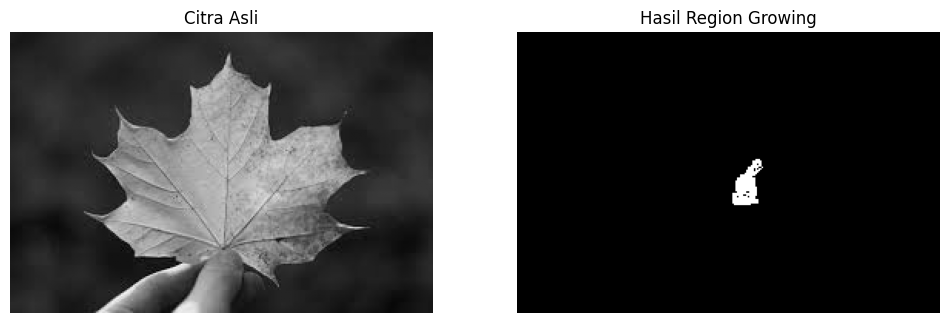

In [9]:
# Proses segmentasi
result = region_growing(maple, seed_point, threshold)

# Visualisasi
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.imshow(maple, cmap='gray')
plt.title('Citra Asli')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(result, cmap='gray')
plt.title('Hasil Region Growing')
plt.axis('off')
plt.show()

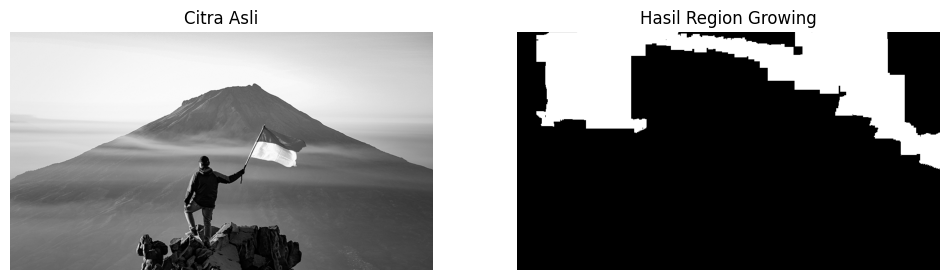

In [10]:
# Proses segmentasi
result = region_growing(mountain, seed_point, threshold)

# Visualisasi
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.imshow(mountain, cmap='gray')
plt.title('Citra Asli')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(result, cmap='gray')
plt.title('Hasil Region Growing')
plt.axis('off')
plt.show()

## Experiment

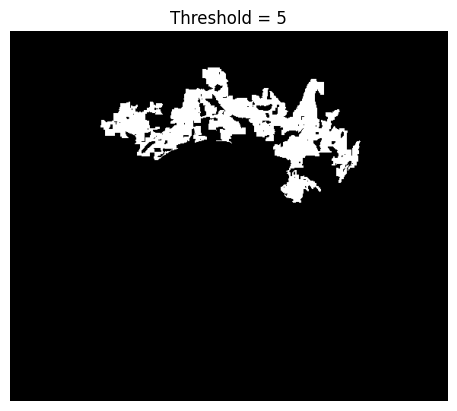

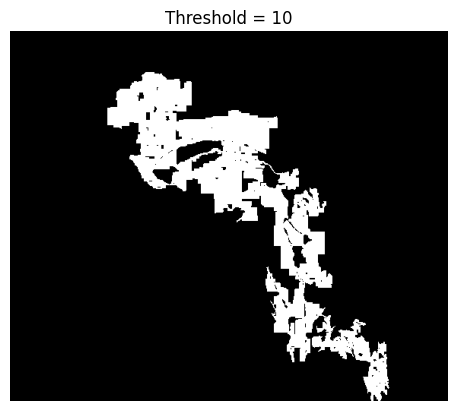

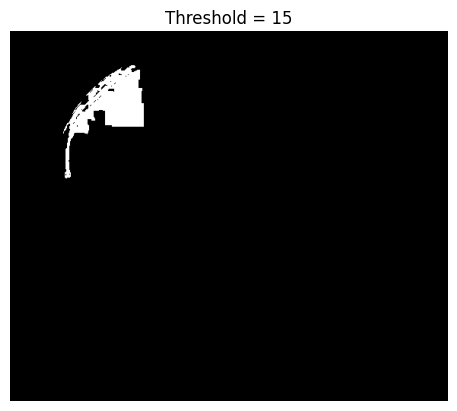

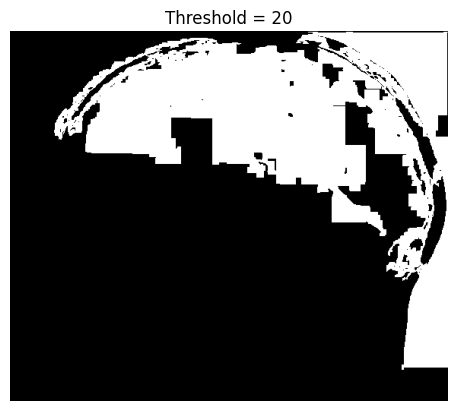

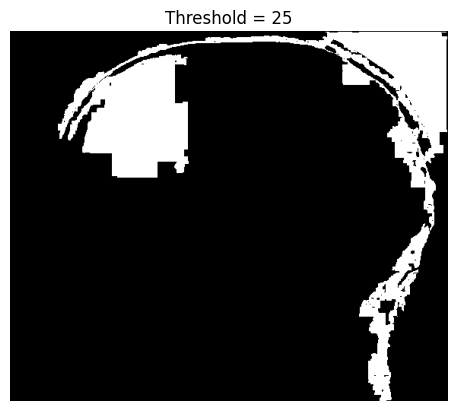

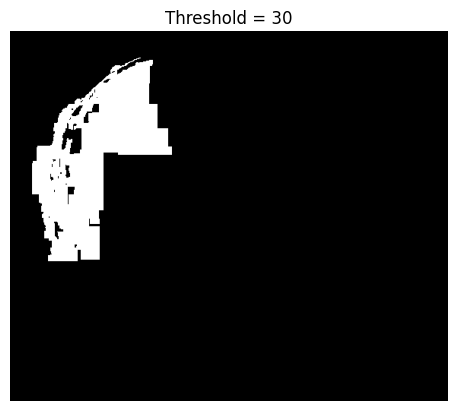

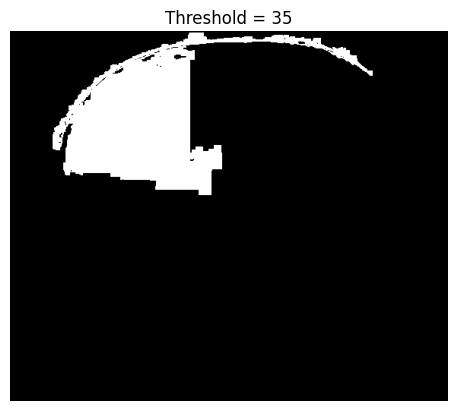

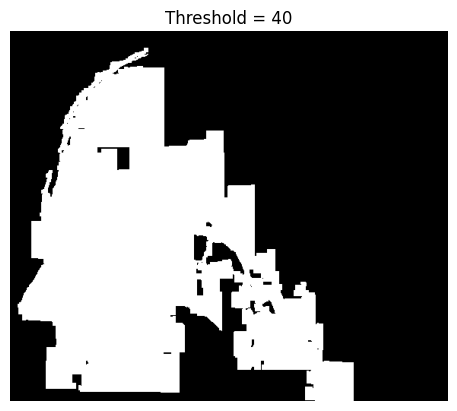

In [12]:
for t in range(5, 41, 5):
    segmented = region_growing(head, seed_point, threshold=t)
    plt.figure()
    plt.imshow(segmented, cmap='gray')
    plt.title(f'Threshold = {t}')
    plt.axis('off')
    plt.show()

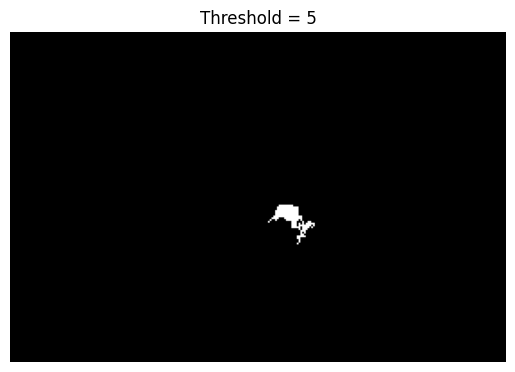

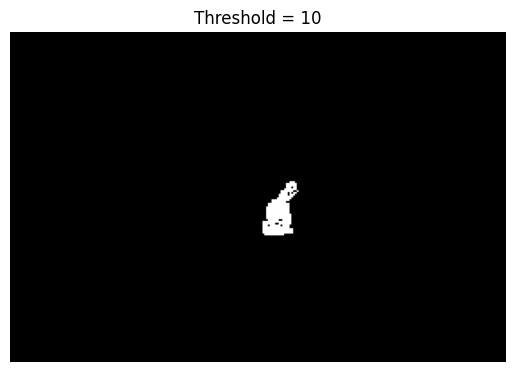

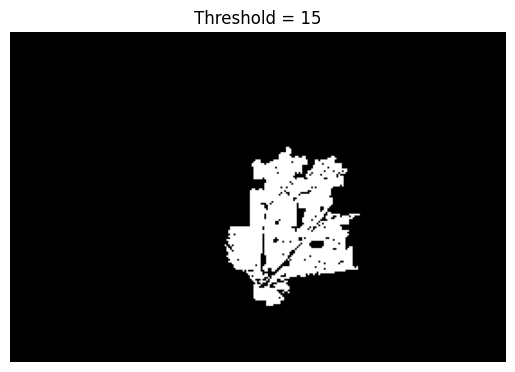

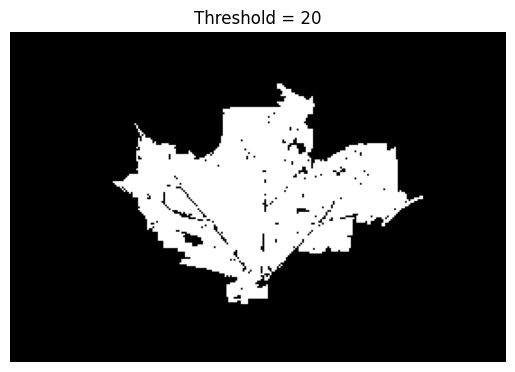

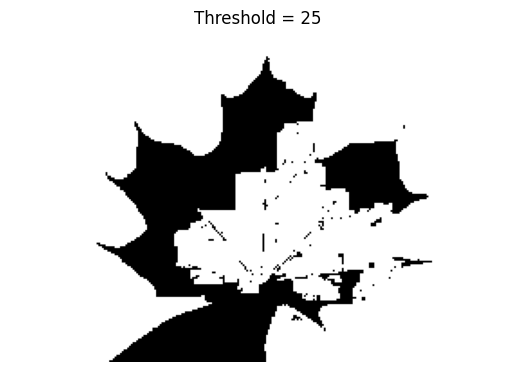

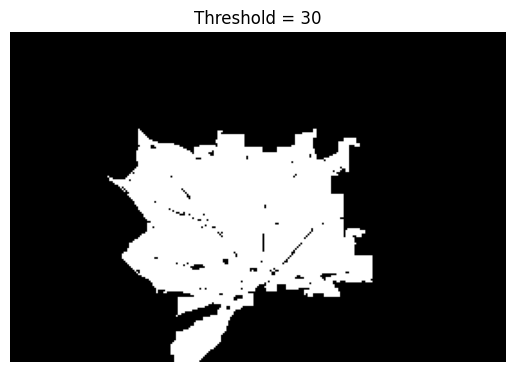

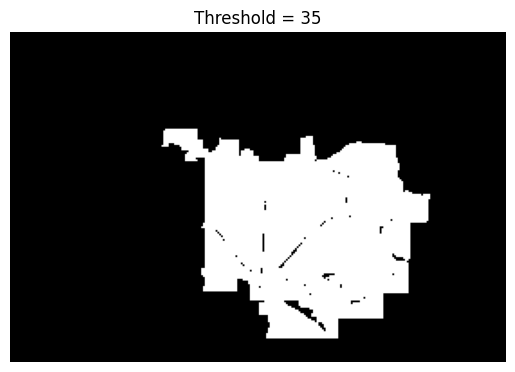

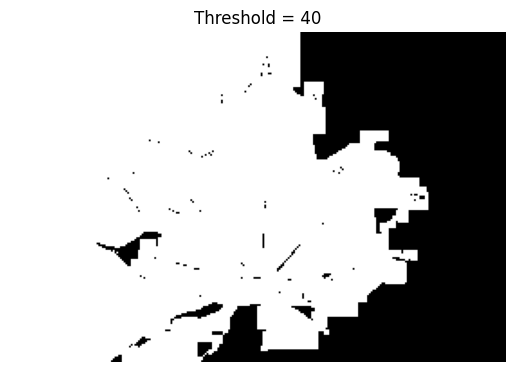

In [15]:
for t in range(5, 41, 5):
    segmented = region_growing(maple, seed_point, threshold=t)
    plt.figure()
    plt.imshow(segmented, cmap='gray')
    plt.title(f'Threshold = {t}')
    plt.axis('off')
    plt.show()

# Integrasi dengan Thresholding dan Deteksi Tepi

## Region Growing + Thresholding :


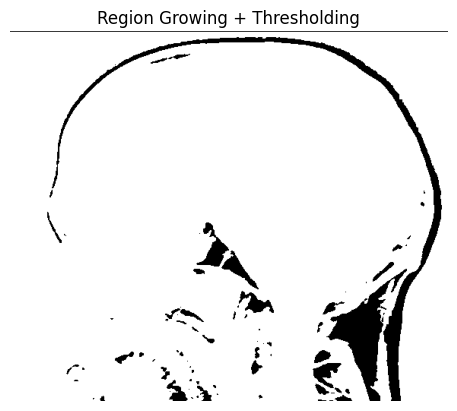

In [16]:
_, binary_mask = cv2.threshold(head, 120, 255, cv2.THRESH_BINARY)
pre_masked = cv2.bitwise_and(head, head, mask=binary_mask)
region = region_growing(pre_masked, (100, 150), 10)

plt.imshow(region, cmap='gray')
plt.title('Region Growing + Thresholding')
plt.axis('off')
plt.show()

##  Region Growing + Deteksi Tepi

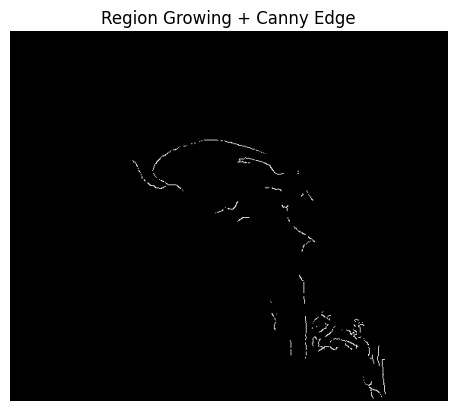

In [20]:
edges = cv2.Canny(head, 50, 150)
region = region_growing(head, (100, 150), 10)
combined = cv2.bitwise_and(region, edges)

plt.imshow(combined, cmap='gray')
plt.title('Region Growing + Canny Edge')
plt.axis('off')
plt.show()